In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
datasheet=pd.read_csv("placement.csv")

In [102]:
datasheet.head(5)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [103]:
datasheet=datasheet.iloc[:,1:]

In [104]:
datasheet.head(4)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1


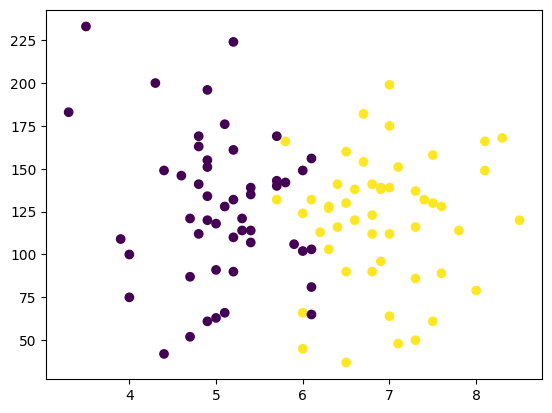

In [105]:
plt.scatter(datasheet["cgpa"],datasheet["iq"],c=datasheet["placement"])

In [106]:
x=datasheet.iloc[:,:2]
y=datasheet.iloc[:,2:]

In [107]:
from sklearn.model_selection import train_test_split 

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1)

In [109]:
x_test

,cgpa,iq
36,5.7,140.0
83,7.5,130.0
24,4.7,121.0
6,5.7,143.0
13,6.4,116.0
55,7.8,114.0
64,7.0,64.0
63,6.3,128.0
87,5.7,132.0
32,7.0,139.0


In [110]:
y_test

,placement
36,0
83,1
24,0
6,0
13,1
55,1
64,1
63,1
87,1
32,1


In [111]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [112]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)  # maile pailai pattern samjisake so aba test ma 
# kunai pani fit garnu pardaina 

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
lgr=LogisticRegression()

In [115]:
lgr.fit(x_train,y_train)

/Users/owner/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [116]:
y_predict=lgr.predict(x_test)

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)


0.9

In [120]:
from mlxtend.plotting import plot_decision_regions

/Users/owner/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/owner/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/owner/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


<Axes: >

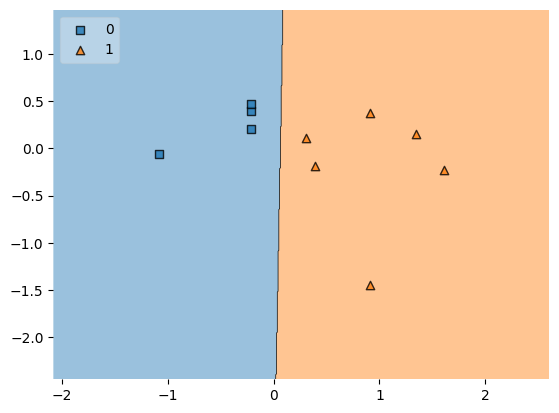

In [121]:
plot_decision_regions(x_test, y_predict, clf=lgr, legend=2)